<a href="https://colab.research.google.com/github/Ralmao/XGBoostCL/blob/main/Flujo_anemia_XGBOOST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("/content/Flujo_anemia2.csv", encoding='latin-1' )
df

,nombre,Hemoglobina,Flujo_Type
0,Rosa Medina,8.5,0
1,Maria Loyo,9.4,0
2,Ivana,8.3,0
3,Rosmary Antequera,8.3,0
4,Nemecio Juarez,8.3,0
...,...,...,...
185,Rodrigo Arangure,15.0,1
186,Miquelina Vasquez,11.0,1
187,Eucaris Ramos,10.4,1
188,Hugo Vasquez,10.0,1


In [3]:
df.drop('nombre', axis = 1, inplace = True)

In [4]:
X = df.drop('Flujo_Type',axis = 1)
y = df['Flujo_Type']

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [6]:
!pip install xgboost

In [7]:
import xgboost as xgb


model = xgb.XGBClassifier(objective ='reg:squarederror', learning_rate = 0.01, max_depth = 42, n_estimators = 100)

model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=42, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='reg:squarederror', predictor=None, ...)

In [8]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)

In [9]:
y_pred

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0])

In [10]:
from sklearn.metrics import confusion_matrix, classification_report

print("Accuracy {} %".format( 100 * accuracy_score(y_pred, y_test)))

Accuracy 97.91666666666666 %


In [11]:
import seaborn as sns

<Axes: >

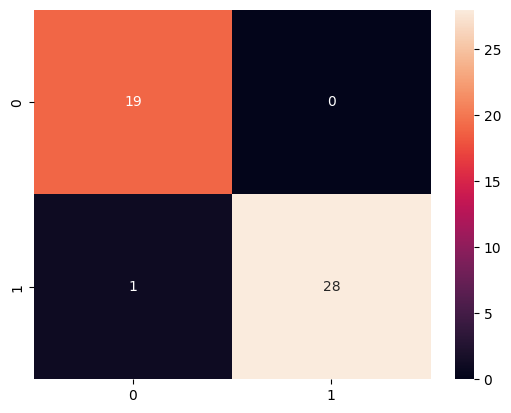

In [12]:
# Eficacia en el conjunto de test
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        20
           1       0.97      1.00      0.98        28

    accuracy                           0.98        48
   macro avg       0.98      0.97      0.98        48
weighted avg       0.98      0.98      0.98        48



In [14]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.2/20.2 MB 60.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.3/298.3 kB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.7/75.7 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 7.1 MB/s eta 0:

In [16]:
import gradio as gr

In [19]:
def predict_Flujotype(Hemoglobina):
    x = np.array([Hemoglobina])
    pred = model.predict(x.reshape(1, -1))

    if pred == 0:
        return "Paciente con anemia empezar con un flujo de 220 e ir incrementando poco a poco hasta llegar a 300"
    else:
        return "Paciente sin anemia empezar con un flujo de 250 e ir incrementando poco a poco hasta llegar a 300"


In [ ]:
Hemoglobina = gr.Number(label='Hemoglobina')
output = gr.Textbox(label='Flujo_Type')
app = gr.Interface(predict_Flujotype,inputs = [Hemoglobina],outputs=output, description= 'This is a Flujo Type Predictor')
app.launch(debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>